In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# LIbreria de arboles:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, confusion_matrix


In [52]:
# Cargar datos

datos = pd.read_csv('D:\Cursos\CienciaDeDatosPython\Datos\melb_data.csv')
datos.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [53]:
datos.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [54]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [55]:
# Borramos valores perdidos o nulos
datos = datos.dropna(axis=0)

In [56]:
# Variales dependientes::

columnas_seleccionadas = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = datos[columnas_seleccionadas]

# Variables predictora y

y = datos.Price



In [57]:


# Imputacion a los faktantes

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

X = pd.DataFrame(imputer.fit_transform(X))

X.columns = columnas_seleccionadas
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


# Separacion de datos de entrenamiento y pruebas

In [58]:
# Separacion de datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definimos el modelo

model = DecisionTreeRegressor(random_state=0)

In [59]:
# ENtrenamiento del modelo

model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=0)

# Predicciones

In [60]:
print("Predicciones para las siguientes casas")
print(X_test)
print("Las predicciones son: ")
prediccion = model.predict(X_test)
print(prediccion)

Predicciones para las siguientes casas
      Rooms  Bathroom  Landsize  Lattitude  Longtitude
2669    2.0       1.0      96.0  -37.85010   144.99530
1281    2.0       1.0       0.0  -37.89020   144.99070
5154    2.0       1.0     136.0  -37.85542   144.99571
2006    3.0       2.0     205.0  -37.79930   145.02670
2701    2.0       1.0     400.0  -37.73520   144.98520
...     ...       ...       ...        ...         ...
3631    3.0       1.0     463.0  -37.81720   144.89240
4013    4.0       3.0       0.0  -37.78310   144.92090
3119    4.0       3.0       0.0  -37.82670   144.96870
3073    2.0       1.0       0.0  -37.84070   145.00400
4990    1.0       1.0       0.0  -37.77154   144.91597

[1240 rows x 5 columns]
Las predicciones son: 
[ 900000.  687500. 1350000. ...  990000.  535000.  390000.]


In [ ]:
#X_test['prediccion'] = prediccion
#X_test['real'] = y_test

#X_test

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,prediccion,real
2669,2.0,1.0,96.0,-37.85010,144.99530,900000.0,NaN
1281,2.0,1.0,0.0,-37.89020,144.99070,687500.0,NaN
5154,2.0,1.0,136.0,-37.85542,144.99571,1350000.0,NaN
2006,3.0,2.0,205.0,-37.79930,145.02670,1050000.0,NaN
2701,2.0,1.0,400.0,-37.73520,144.98520,850000.0,NaN
...,...,...,...,...,...,...,...
3631,3.0,1.0,463.0,-37.81720,144.89240,1275000.0,610000.0
4013,4.0,3.0,0.0,-37.78310,144.92090,1000000.0,NaN
3119,4.0,3.0,0.0,-37.82670,144.96870,990000.0,NaN
3073,2.0,1.0,0.0,-37.84070,145.00400,535000.0,NaN


# VAlidacion del modelo

In [61]:
prediccion = model.predict(X_test)
mean_absolute_error(y_test, prediccion)

276381.9889784946

In [62]:
# FUncion obtener error medio

def dame_mae(maximo_nodos, X_train, X_test, y_test, y_train):
    mae_values = []
    for n in maximo_nodos:
        model = DecisionTreeRegressor(max_depth=n, random_state=0)
        model.fit(X_train, y_train)
        prediccion = model.predict(X_test)
        mae_values.append(mean_absolute_error(y_test, prediccion))
    return mae_values

[434308.7088120863, 389048.16648428276, 353033.11092132895, 318687.3949699476, 294828.1392075813, 280562.24749465566, 273567.5207062903, 257610.66222793268, 250605.22891272392, 255712.61754506433]


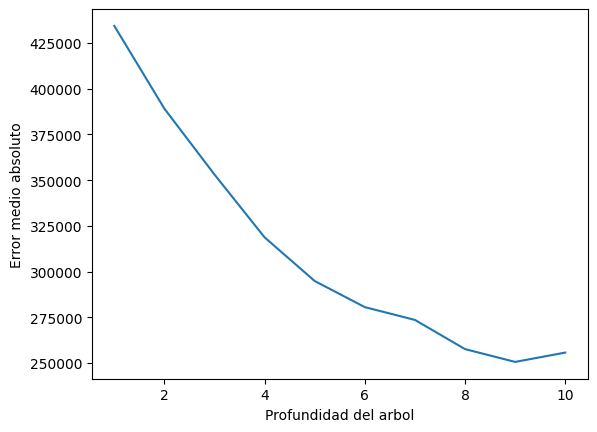

In [72]:
# Comparamos con diferentes profuncidades

maximo_nodos = np.arange(1, 11)
mae_values = dame_mae(maximo_nodos, X_train, X_test, y_test, y_train)
plt.plot(maximo_nodos, mae_values)
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error medio absoluto')
print(mae_values)